In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install --quiet transformers umap-learn altair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 88.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 72.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [4]:
import re
import sys
import time
import nltk
import warnings
import collections
import json, codecs
import numpy as np
import umap
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/Colab Notebooks/intron/accentfold/train_accent_embeddings_7_2_1.json"
file_path1 = "/content/drive/MyDrive/Colab Notebooks/intron/accentfold/test_accent_embeddings_7_2_1.json"
file_path2 = "/content/drive/MyDrive/Colab Notebooks/intron/accentfold/dev_accent_embeddings_7_2_1.json"


data_train= pd.read_json(file_path, lines=True)#)
data_train["split"] = "train"
data_test= pd.read_json(file_path1, lines=True)#)
data_test["split"] = "test"
data_dev= pd.read_json(file_path2, lines=True)#)
data_dev["split"] = "dev"
data=pd.concat([data_train,data_test,data_dev])
data.head()

,audio_ids,accent,embeddings,domain,country,split
0,ffd85ba8fb7b158dbeec38477fb4456f,yoruba,"[-1.313591599464416, -0.6090016961097711, -0.5...",clinical,US,train
1,6ba0ed9db0e79ed5100d13f28e8abaea,yoruba,"[-0.604574799537658, -0.8480290174484251, -0.4...",clinical,US,train
2,14267a355d256dd039ce08b746e0f0e6,yoruba,"[-0.95160949230194, -0.8273317813873291, -0.55...",clinical,US,train
3,1d0496b328d324bbf2e6d39593853418,yoruba,"[-1.261855721473693, -0.639067888259887, -1.08...",clinical,US,train
4,2482b97c9bf0b38be4d0523110ee9719,yoruba,"[-1.295401334762573, -0.755861699581146, -1.08...",clinical,US,train


In [5]:
accent_to_region ={
    "yoruba": "West Africa",
    "igbo": "West Africa",
    "swahili": "East Africa",
    "hausa": "West Africa",
    "ijaw": "West Africa",
    "afrikaans": "Southern Africa",
    "idoma": "West Africa",
    "zulu": "Southern Africa",
    "setswana": "Southern Africa",
    "twi": "West Africa",
    "isizulu": "Southern Africa",
    "igala": "West Africa",
    "izon": "West Africa",
    "kiswahili": "East Africa",
    "ebira": "West Africa",
    "luganda": "East Africa",
    "urhobo": "West Africa",
    "nembe": "West Africa",
    "ibibio": "West Africa",
    "pidgin": "West Africa",
    "luhya": "East Africa",
    "kinyarwanda": "East Africa",
    "xhosa": "Southern Africa",
    "tswana": "Southern Africa",
    "esan": "West Africa",
    "alago": "West Africa",
    "tshivenda": "Southern Africa",
    "fulani": "West Africa",
    "isoko": "West Africa",
    "akan (fante)": "West Africa",
    "ikwere": "West Africa",
    "sepedi": "Southern Africa",
    "efik": "West Africa",
    "edo": "West Africa",
    "luo": "East Africa",
    "kikuyu": "East Africa",
    "bekwarra": "West Africa",
    "isixhosa": "Southern Africa",
    "hausa/fulani": "West Africa",
    "epie": "West Africa",
    "isindebele": "Southern Africa",
    "venda and xitsonga": "Southern Africa",
    "sotho": "Southern Africa",
    "akan": "West Africa",
    "nupe": "West Africa",
    "anaang": "West Africa",
    "english": "Various Regions",
    "afemai": "West Africa",
    "shona": "Southern Africa",
    "eggon": "West Africa",
    "luganda and kiswahili": "East Africa",
    "ukwuani": "West Africa",
    "sesotho": "Southern Africa",
    "benin": "West Africa",
    "kagoma": "West Africa",
    "nasarawa eggon": "West Africa",
    "tiv": "West Africa",
    "south african english": "Southern Africa",
    "borana": "East Africa",
    "swahili ,luganda ,arabic": "East Africa",
    "ogoni": "West Africa",
    "mada": "West Africa",
    "bette": "West Africa",
    "berom": "West Africa",
    "bini": "West Africa",
    "ngas": "West Africa",
    "etsako": "West Africa",
    "okrika": "West Africa",
    "venda": "Southern Africa",
    "siswati": "Southern Africa",
    "damara": "Southern Africa",
    "yoruba, hausa": "West Africa",
    "southern sotho": "Southern Africa",
    "kanuri": "West Africa",
    "itsekiri": "West Africa",
    "ekpeye": "West Africa",
    "mwaghavul": "West Africa",
    "bajju": "West Africa",
    "luo, swahili": "East Africa",
    "dholuo": "East Africa",
    "ekene": "West Africa",
    "jaba": "West Africa",
    "ika": "West Africa",
    "angas": "West Africa",
    "ateso": "East Africa",
    "brass": "West Africa",
    "ikulu": "West Africa",
    "eleme": "West Africa",
    "chichewa": "Southern Africa",
    "oklo": "West Africa",
    "meru": "East Africa",
    "agatu": "West Africa",
    "okirika": "West Africa",
    "igarra": "West Africa",
    "ijaw(nembe)": "West Africa",
    "khana": "West Africa",
    "ogbia": "West Africa",
    "gbagyi": "West Africa",
    "portuguese": "Various Regions",
    "delta": "West Africa",
    "bassa": "West Africa",
    "etche": "West Africa",
    "kubi": "West Africa",
    "jukun": "West Africa",
    "igbo and yoruba": "West Africa",
    "urobo": "West Africa",
    "kalabari": "West Africa",
    "ibani": "West Africa",
    "obolo": "West Africa",
    "idah": "West Africa",
    "bassa-nge/nupe": "West Africa",
    "yala mbembe": "West Africa",
    "eket": "West Africa",
    "afo": "West Africa",
    "ebiobo": "West Africa",
    "nyandang": "West Africa",
    "ishan": "West Africa",
    "bagi": "West Africa",
    "estako": "West Africa",
    "gerawa": "West Africa"
}


In [6]:
data['region'] = data.accent.apply(lambda x: accent_to_region[x])

In [7]:
len(data[data['region']=="West Africa"]['accent'].unique())

84

In [8]:
data

,audio_ids,accent,embeddings,domain,country,split,region
0,ffd85ba8fb7b158dbeec38477fb4456f,yoruba,"[-1.313591599464416, -0.6090016961097711, -0.5...",clinical,US,train,West Africa
1,6ba0ed9db0e79ed5100d13f28e8abaea,yoruba,"[-0.604574799537658, -0.8480290174484251, -0.4...",clinical,US,train,West Africa
2,14267a355d256dd039ce08b746e0f0e6,yoruba,"[-0.95160949230194, -0.8273317813873291, -0.55...",clinical,US,train,West Africa
3,1d0496b328d324bbf2e6d39593853418,yoruba,"[-1.261855721473693, -0.639067888259887, -1.08...",clinical,US,train,West Africa
4,2482b97c9bf0b38be4d0523110ee9719,yoruba,"[-1.295401334762573, -0.755861699581146, -1.08...",clinical,US,train,West Africa
...,...,...,...,...,...,...,...
2878,783ea5ff41f497363f5f740e21f75d1c,itsekiri,"[-2.623120784759521, -1.61293339729309, -1.029...",general,NG,dev,West Africa
2879,77f4e3ca99bce729024b62684962cb39,itsekiri,"[-1.40275764465332, -0.030445983633399003, -1....",general,NG,dev,West Africa
2880,ea11002718030aeb186a41330b612e3a,itsekiri,"[-3.708812713623047, -0.6365858316421501, -0.7...",general,NG,dev,West Africa
2881,c079f4382543a59e1e3ddd5108526c80,itsekiri,"[-1.33560311794281, -0.9972214102745051, -0.20...",general,NG,dev,West Africa


In [9]:
data.reset_index(drop=True, inplace=True)
data

,audio_ids,accent,embeddings,domain,country,split,region
0,ffd85ba8fb7b158dbeec38477fb4456f,yoruba,"[-1.313591599464416, -0.6090016961097711, -0.5...",clinical,US,train,West Africa
1,6ba0ed9db0e79ed5100d13f28e8abaea,yoruba,"[-0.604574799537658, -0.8480290174484251, -0.4...",clinical,US,train,West Africa
2,14267a355d256dd039ce08b746e0f0e6,yoruba,"[-0.95160949230194, -0.8273317813873291, -0.55...",clinical,US,train,West Africa
3,1d0496b328d324bbf2e6d39593853418,yoruba,"[-1.261855721473693, -0.639067888259887, -1.08...",clinical,US,train,West Africa
4,2482b97c9bf0b38be4d0523110ee9719,yoruba,"[-1.295401334762573, -0.755861699581146, -1.08...",clinical,US,train,West Africa
...,...,...,...,...,...,...,...
57603,783ea5ff41f497363f5f740e21f75d1c,itsekiri,"[-2.623120784759521, -1.61293339729309, -1.029...",general,NG,dev,West Africa
57604,77f4e3ca99bce729024b62684962cb39,itsekiri,"[-1.40275764465332, -0.030445983633399003, -1....",general,NG,dev,West Africa
57605,ea11002718030aeb186a41330b612e3a,itsekiri,"[-3.708812713623047, -0.6365858316421501, -0.7...",general,NG,dev,West Africa
57606,c079f4382543a59e1e3ddd5108526c80,itsekiri,"[-1.33560311794281, -0.9972214102745051, -0.20...",general,NG,dev,West Africa


In [ ]:
sa= np.array([np.array(xi) for xi in data[data['split']=="test"]["embeddings"]])

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.decomposition import PCA

tsne = TSNE(n_components=2, random_state=0)
projections_test = tsne.fit_transform(sa)


In [ ]:
data2 = data[data['split']=="test"].copy()
data2['x'] = projections_test[:,0]
data2['y'] = projections_test[:,1]


In [ ]:
# data2 = data2.sample(frac=1)
data2= data2.reset_index()

In [ ]:
data2

,index,accent,embeddings,domain,split,country,region,x,y
0,0,twi,"[0.137416243553161, 0.311771273612976, -1.1762...",clinical,test,GH,West Africa,65.121788,-1.074571
1,1,igbo,"[1.242555737495422, 2.832766532897949, -3.1572...",clinical,test,NG,West Africa,74.282104,-6.044974
2,2,isizulu,"[0.478777438402175, 0.539505362510681, -0.1963...",clinical,test,ZA,Southern Africa,65.318405,1.123858
3,3,luganda,"[-0.412924379110336, -0.8092683553695671, -1.1...",clinical,test,UG,East Africa,67.677162,-0.542994
4,4,setswana,"[1.383709907531738, 1.632986903190612, -1.3338...",clinical,test,BW,Southern Africa,71.853149,-5.136772
...,...,...,...,...,...,...,...,...,...
5469,5469,igarra,"[-2.085776329040527, -0.14793080091476402, 0.0...",clinical,test,NG,West Africa,-1.373732,-45.040161
5470,5470,delta,"[-0.8231935501098631, -0.478132486343383, -0.1...",clinical,test,NG,West Africa,13.112857,6.493972
5471,5471,yoruba,"[-1.442798018455505, 0.154852852225303, -0.096...",clinical,test,NG,West Africa,-27.303362,14.429297
5472,5472,tswana,"[1.480266094207763, 0.614755928516387, 0.81313...",general,test,ZA,Southern Africa,61.347210,21.965536


In [ ]:
df_accent = np.array_split(data2[data2["region"]=="West Africa"]["accent"].unique(), 2)

In [ ]:
df_accent[1]

array(['ibibio', 'esan', 'isoko', 'edo', 'epie', 'afemai', 'nupe', 'tiv',
       'ogoni', 'eggon', 'anaang', 'bini', 'yoruba, hausa', 'ekpeye',
       'bajju', 'kanuri', 'delta', 'khana', 'ogbia', 'mada', 'mwaghavul',
       'angas', 'ikulu', 'eleme', 'igarra', 'etche', 'agatu', 'bassa',
       'jukun', 'urobo', 'ibani', 'obolo', 'idah', 'eket', 'nyandang',
       'estako', 'ishan', 'bassa-nge/nupe', 'bagi', 'gerawa', 'ngas'],
      dtype=object)

In [ ]:
for i in range(len(data2)):
    if data2.loc[i, 'accent'] in df_accent[0]:
        data2.loc[i, 'region']  = "West Africa 1"
    elif  data2.loc[i, 'accent'] in df_accent[1]:
        data2.loc[i, 'region']  = "West Africa 2"
    else:
        pass

In [ ]:
data2.region.value_counts()

West Africa 1      2510
West Africa 2      1665
East Africa         673
Southern Africa     560
Various Regions      66
Name: region, dtype: int64



colours=   [["YlOrRd_r","Wistia_r"], "Blues_r", "Reds_r", "copper_r"]
legend_position=   ["upper left", "upper right", "lower right", "lower left", "copper_r"]

plt.figure(figsize=(100, 100))
fig,ax = plt.subplots(figsize=(20, 20))

for i, (col, region) in enumerate(zip(colours, data2['region'].unique())):
    subset = data2[data2["region"]==region]
    if region=="West Africa":
        subset = np.array_split(data2, 2)
        subset[0]["region"] = "West Africa1"
        subset[1]["region"] = "West Africa 2"
        for k in range(len(subset)):
            z = [np.where(np.array(list(dict.fromkeys(subset[k]['accent'])))==e)[0][0]for e in subset[k]['accent']]
            scatter1 = ax.scatter(subset[k]['x'],subset[k]['y'], c = z, 
                    #norm = plt.Normalize(vmin=2, vmax=len(subset['accent'].unique())),
                    cmap = col[k],
                    label=list(subset[k]['accent'].unique()))
            legend1 = ax.legend(*scatter1.legend_elements(prop='colors',  num=range(len(subset[k]['accent'].unique()))),
                            loc=legend_position[i], title=region)
            ax.add_artist(legend1)
        else:
            pass


plt.show()   

West Africa 1
Southern Africa
East Africa
Various Regions
West Africa 2


<Figure size 15000x15000 with 0 Axes>

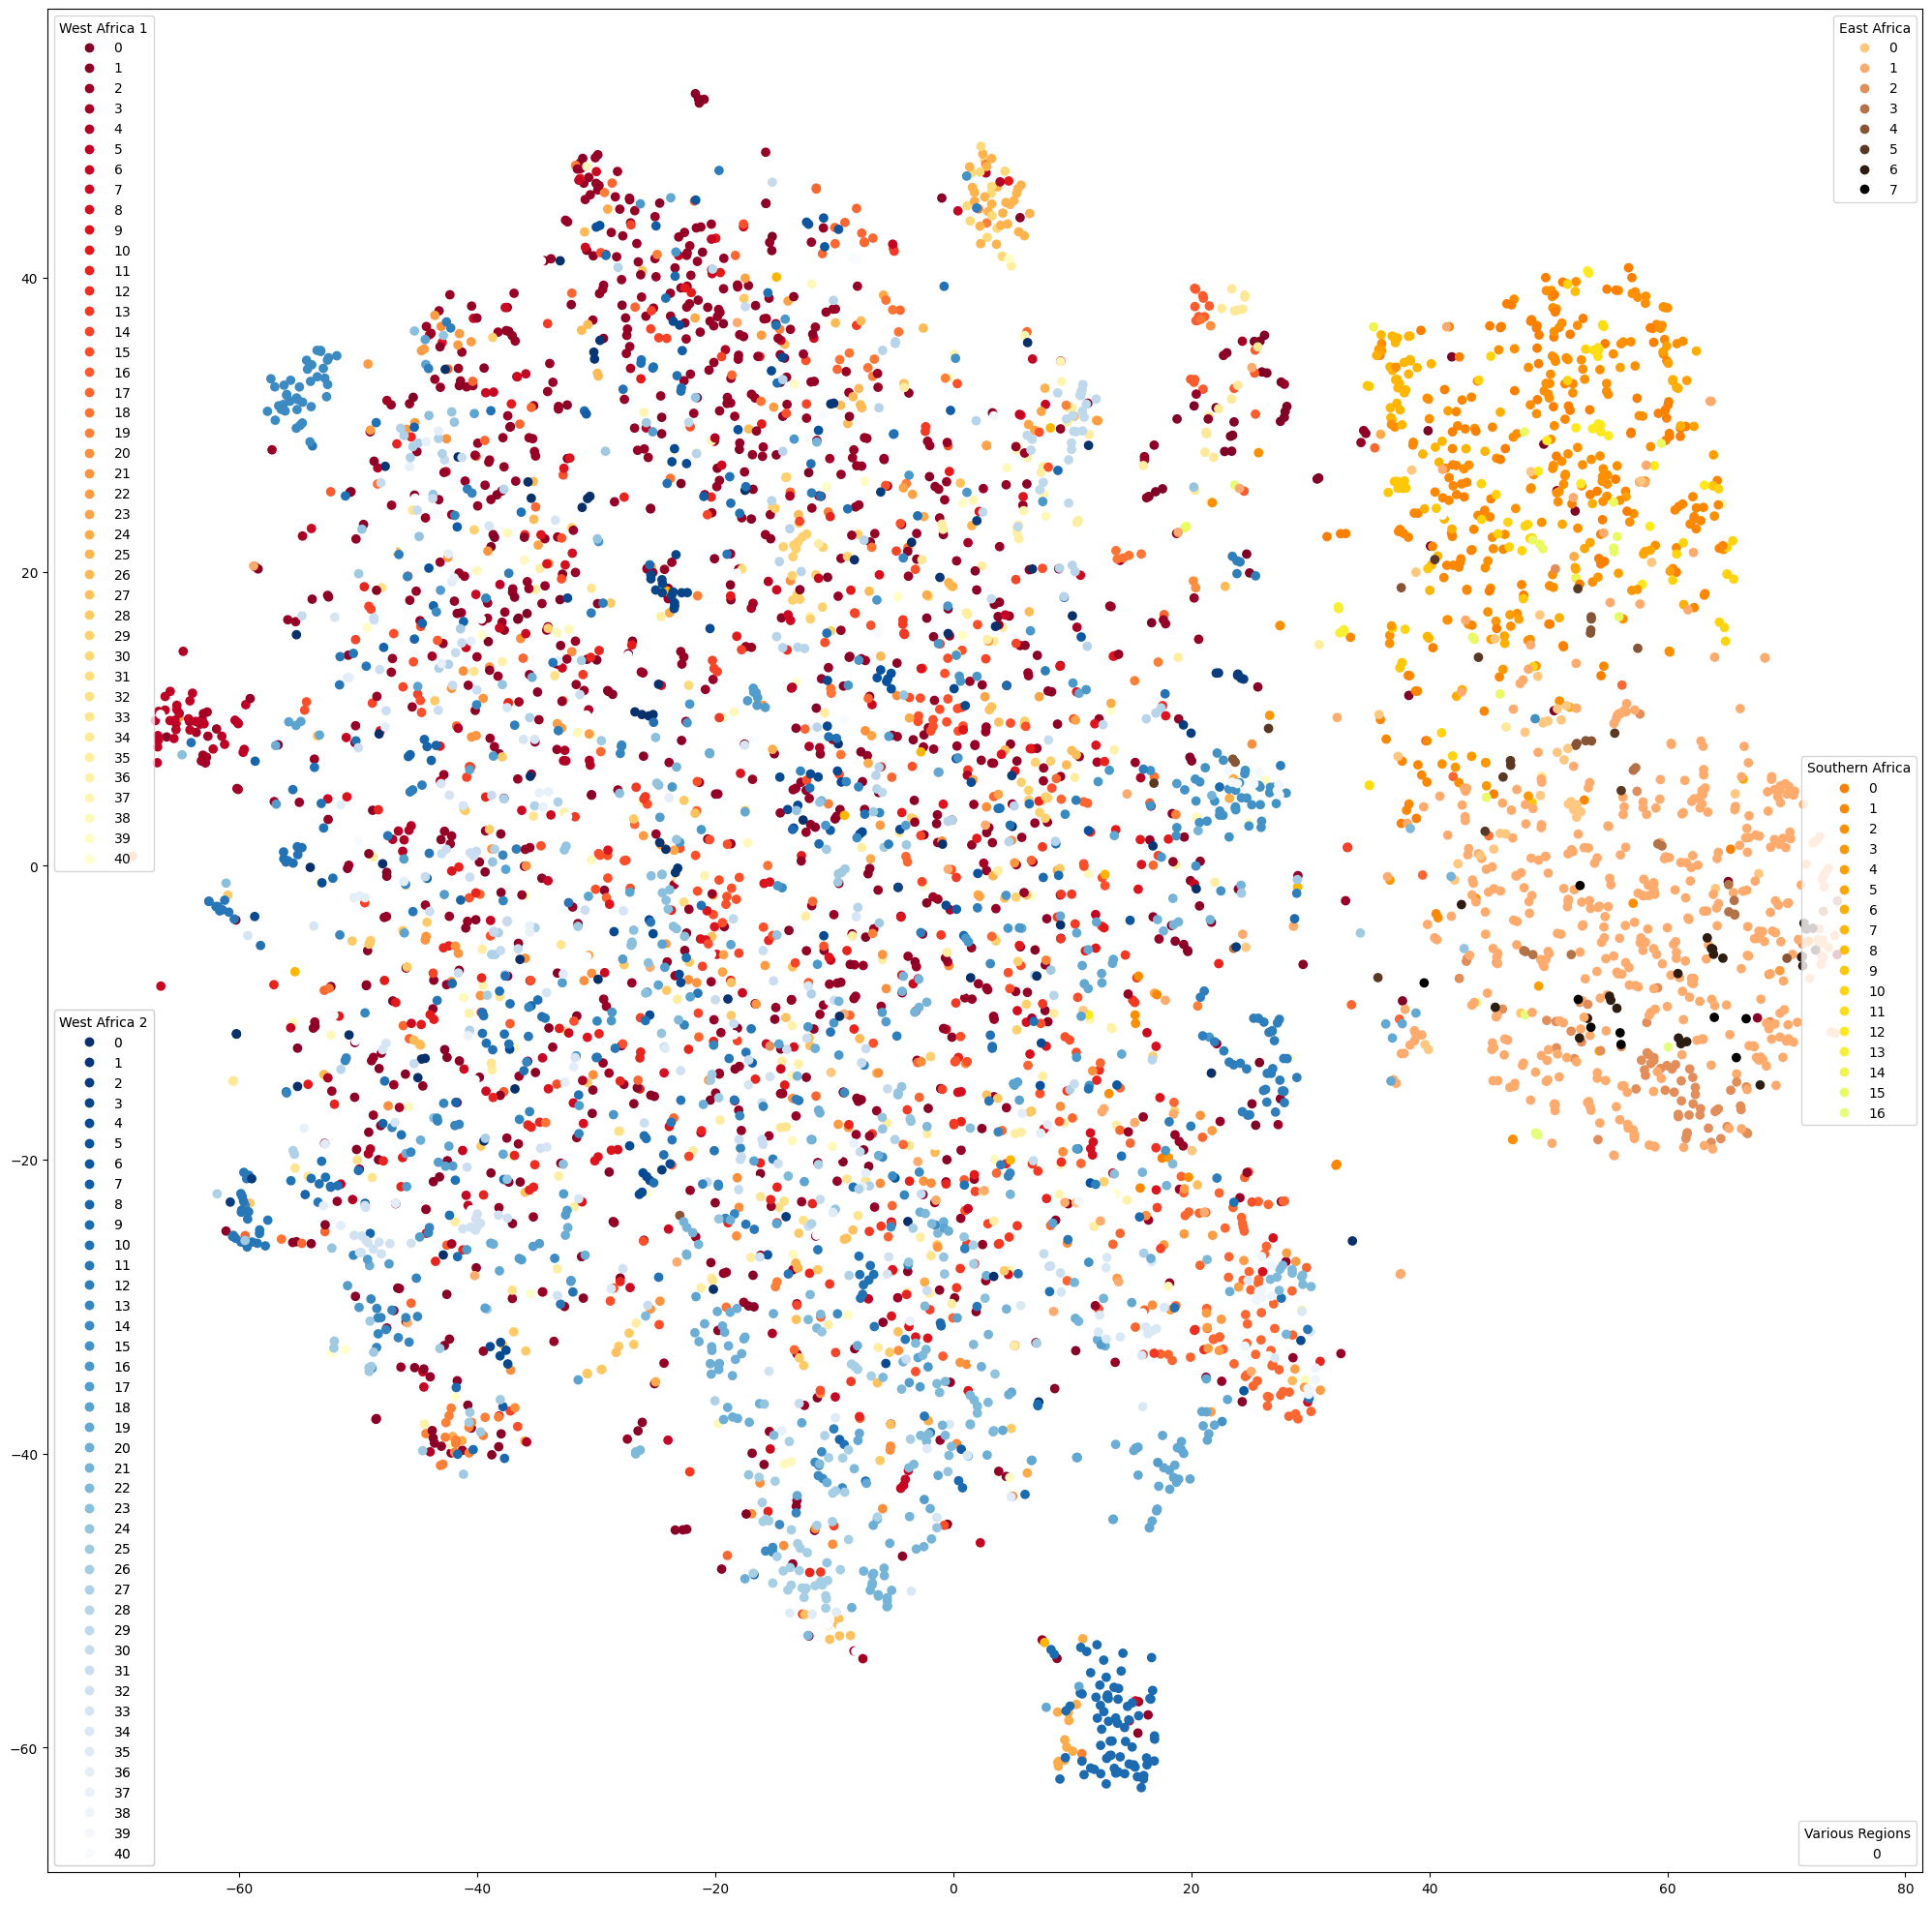

In [ ]:
colours=   ["YlOrRd_r","Wistia_r", "copper_r", "gray_r", "Blues_r"]
legend_position=   ["upper left","center right", "upper right", "lower right", "lower left"]

plt.figure(figsize=(150, 150))
fig,ax = plt.subplots(figsize=(25, 25))

for i, (col, region) in enumerate(zip(colours, data2['region'].unique())):
    print(region)
    subset = data2[data2["region"]==region]
    z = [np.where(np.array(list(dict.fromkeys(subset['accent'])))==e)[0][0]for e in subset['accent']]
    scatter1 = ax.scatter(subset['x'],subset['y'], c = z, 
            #norm = plt.Normalize(vmin=2, vmax=len(subset['accent'].unique())),
            cmap = col,
            label=list(subset['accent'].unique()))
    legend1 = ax.legend(*scatter1.legend_elements(prop='colors',  num=range(len(subset['accent'].unique()))),
                      loc=legend_position[i], title=region)
    ax.add_artist(legend1)
plt.show()   

In [ ]:
W__A = data2[data2["region"]=="East Africa"]

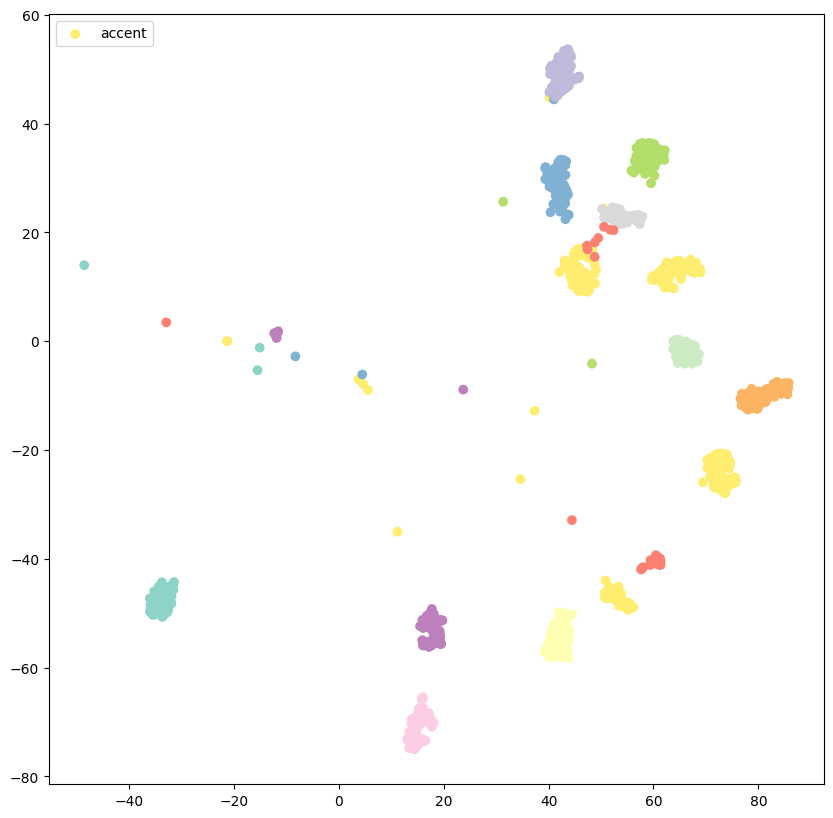

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig,ax = plt.subplots(figsize=(10, 10))
z = [np.where(np.array(list(dict.fromkeys(W__A['accent'])))==e)[0][0]for e in W__A['accent']]
ax.scatter(W__A['x'],W__A['y'], c = z, 
            norm = plt.Normalize(vmin=2, vmax=len(W__A['accent'].unique())), 
            label= 'accent',
            cmap = "Set3_r")
plt.legend(loc="upper left")

plt.show()

In [ ]:
fig = px.scatter(
    projections_test, x=0, y=1,
    color=data2.region, labels={'color': 'region'}
    )

fig.update_layout(
    autosize=False,
    yaxis_range=[-80,80],
    xaxis_range=[-80,80],
    width=1000,
    height=1000,)

fig.show()

In [ ]:
fig = px.scatter(
    projections_test, x=0, y=1,
    color=data2.accent, labels={'color': 'Accent'}
    )

fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,)

fig.show()

In [ ]:
fig = px.scatter(
    projections_test, x=0, y=1,
    color=data2.country, labels={'color': 'Country'}
    )

fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,)

fig.show()

# For Top 5 alone 

In [ ]:
data= data.sample(frac=1)
new_df = pd.DataFrame(columns=data.columns)
top_5 = data.accent.value_counts()[:5].index #["yoruba", "igbo", "hausa", "hausa/fulani", "igbo and yoruba"]  #d
for index, row in data.iterrows():
    if row['accent'] in top_5:
        new_df = new_df.append(row)
        # if len(new_df[new_df["accent"]==row["accent"]])<100:
            # new_df = new_df.append(row)

Streaming output truncated to the last 5000 lines.
<ipython-input-39-e8aa4d5f344f>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-39-e8aa4d5f344f>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-39-e8aa4d5f344f>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-39-e8aa4d5f344f>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-39-e8aa4d5f344f>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-39-e8aa4d5f344f>:6: FutureWarning:

The frame.append method is deprecated and will b

In [ ]:
new_df

,accent,embeddings,domain,split,country,region
1724,yoruba,"[-0.684108436107635, 2.732529163360595, -0.575...",general,test,NG,West Africa
341,swahili,"[1.0432378053665161, 1.6548171043395992, 0.086...",clinical,test,KE,East Africa
1977,igbo,"[0.051791604608297, 1.8195359706878662, -0.955...",clinical,test,NG,West Africa
1503,yoruba,"[-1.445728540420532, -0.7898781299591061, -0.2...",clinical,test,NG,West Africa
4664,hausa,"[-1.333714365959167, -1.595478773117065, -0.65...",clinical,test,NG,West Africa
...,...,...,...,...,...,...
1873,igbo,"[-2.388081550598144, 0.331162273883819, -0.192...",clinical,test,NG,West Africa
5350,igbo,"[-0.28739821910858104, -0.576826632022857, 0.2...",general,test,NG,West Africa
5280,swahili,"[0.43740895390510504, 0.8435001969337461, 0.26...",general,test,UG,East Africa
485,hausa,"[-1.62604820728302, -0.360134750604629, -0.849...",clinical,train,NaN,West Africa


In [ ]:
sa= np.array([np.array(xi) for xi in new_df["embeddings"]])

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
data1 = pca.fit_transform(sa)

fig = px.scatter(
    data1, x=0, y=1,
    color=new_df.accent, labels={'color': 'accent'}
)
fig.show()


In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.decomposition import PCA

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(sa)



In [ ]:
new_df['x'] = projections[:,0]
new_df['y'] = projections[:,1]


In [ ]:
ndf_accent = np.array_split(new_df[new_df["region"]=="West Africa"]["accent"].unique(), 2)
ndf_accent[0]

array(['yoruba', 'hausa'], dtype=object)

In [ ]:
ndf_accent = np.array_split(new_df[new_df["region"]=="West Africa"]["accent"].unique(), 2)
for i in range(len(new_df)):
    if new_df.loc[i, 'accent'] in ndf_accent[0]:
        new_df.loc[i, 'region']  = "West Africa 1"
    elif  new_df.loc[i, 'accent'] in ndf_accent[1]:
        new_df.loc[i, 'region']  = "West Africa 2"
    else:
        pass

KeyError: ignored

In [ ]:
fig = px.scatter(
    projections, x=0, y=1,
    color=new_df.accent, labels={'color': 'Accent'}
    )

fig.update_layout(
    autosize=False,
    width=800,
    height=800,)

fig.show()

#UMAP tranforamtion 

In [ ]:
sa_train= np.array([np.array(xi) for xi in data[data['split']=="train"]["embeddings"]])

In [ ]:
sa_train= np.array([np.array(xi) for xi in data[data['split']=="train"]["embeddings"]])
sa_test= np.array([np.array(xi) for xi in data[data['split']=="test"]["embeddings"]])
sa_dev= np.array([np.array(xi) for xi in data[data['split']=="dev"]["embeddings"]])

In [ ]:
"""
Reduce the dimensions of the generated embeddings and visualize
"""

reducer = umap.UMAP(n_neighbors=300) 
umap_embeds = reducer.fit_transform(sa_train)

In [ ]:
len(sa_test)

5474

In [ ]:
umap_embeds_test = reducer.transform(sa_test)

In [ ]:
train_data = data[data['split']=="train"].copy()
train_data['x'] = umap_embeds[:,0]
train_data['y'] = umap_embeds[:,1]

In [ ]:
test_data = data[data['split']=="test"].copy()
test_data['x'] = umap_embeds_test[:,0]
test_data['y'] = umap_embeds_test[:,1]

ValueError: ignored

In [ ]:
import plotly.express as px

fig = px.scatter(
    train_data, x='x', y='y',
    color=train_data.accent, labels={'color': 'Accent'}
    )

fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,)

fig.show()

#Centriods and distances

In [10]:
data3 = data.copy()
data3[list(range(len(data3['embeddings'][0])))] = pd.DataFrame(data3.embeddings.tolist(), index= data3.index)

<ipython-input-10-01b6714d2b8c>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data3[list(range(len(data3['embeddings'][0])))] = pd.DataFrame(data3.embeddings.tolist(), index= data3.index)
<ipython-input-10-01b6714d2b8c>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data3[list(range(len(data3['embeddings'][0])))] = pd.DataFrame(data3.embeddings.tolist(), index= data3.index)
<ipython-input-10-01b6714d2b8c>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

In [11]:
data3

,audio_ids,accent,embeddings,domain,country,split,region,0,1,2,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,ffd85ba8fb7b158dbeec38477fb4456f,yoruba,"[-1.313591599464416, -0.6090016961097711, -0.5...",clinical,US,train,West Africa,-1.313592,-0.609002,-0.551177,...,0.021766,-0.597124,0.909128,0.831636,-1.124030,0.215091,0.674233,0.253417,0.052755,-0.432904
1,6ba0ed9db0e79ed5100d13f28e8abaea,yoruba,"[-0.604574799537658, -0.8480290174484251, -0.4...",clinical,US,train,West Africa,-0.604575,-0.848029,-0.453190,...,0.168620,-0.751310,1.314867,0.389222,-1.524246,1.084922,0.294594,0.021942,1.911426,0.117819
2,14267a355d256dd039ce08b746e0f0e6,yoruba,"[-0.95160949230194, -0.8273317813873291, -0.55...",clinical,US,train,West Africa,-0.951609,-0.827332,-0.552928,...,0.070518,-0.526014,1.442308,0.549089,-1.423965,0.537749,0.670758,0.058526,0.955356,-0.101532
3,1d0496b328d324bbf2e6d39593853418,yoruba,"[-1.261855721473693, -0.639067888259887, -1.08...",clinical,US,train,West Africa,-1.261856,-0.639068,-1.088156,...,0.106653,-0.682466,1.166011,0.512841,-1.825625,0.301414,0.494173,0.180765,0.889508,-0.239151
4,2482b97c9bf0b38be4d0523110ee9719,yoruba,"[-1.295401334762573, -0.755861699581146, -1.08...",clinical,US,train,West Africa,-1.295401,-0.755862,-1.089568,...,-0.102394,-0.566216,1.201644,0.342866,-2.013919,0.583305,0.721663,0.496334,0.624057,0.239349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57603,783ea5ff41f497363f5f740e21f75d1c,itsekiri,"[-2.623120784759521, -1.61293339729309, -1.029...",general,NG,dev,West Africa,-2.623121,-1.612933,-1.029299,...,-0.921875,1.254357,-0.147588,0.362140,-0.209686,-2.094556,0.127315,-0.459532,-0.779161,-1.759485
57604,77f4e3ca99bce729024b62684962cb39,itsekiri,"[-1.40275764465332, -0.030445983633399003, -1....",general,NG,dev,West Africa,-1.402758,-0.030446,-1.298602,...,-0.315874,0.011013,-0.194703,0.408080,-1.815765,-0.020593,-0.213175,0.379858,-0.168334,-0.671986
57605,ea11002718030aeb186a41330b612e3a,itsekiri,"[-3.708812713623047, -0.6365858316421501, -0.7...",general,NG,dev,West Africa,-3.708813,-0.636586,-0.718678,...,-2.070143,1.736816,-0.432754,0.491119,0.288054,-1.145514,0.366649,0.240334,-0.539766,-1.474858
57606,c079f4382543a59e1e3ddd5108526c80,itsekiri,"[-1.33560311794281, -0.9972214102745051, -0.20...",general,NG,dev,West Africa,-1.335603,-0.997221,-0.200674,...,-0.883908,0.362818,0.333518,0.215610,-0.255839,0.198162,-0.342185,0.148938,-0.417154,0.444208


In [17]:
data3.groupby("accent").count()

,audio_ids,embeddings,domain,country,split,region,0,1,2,3,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
accent,,,,,,,,,,,,,,,,,,,,,
afemai,87,103,103,103,103,103,103,103,103,103,...,103,103,103,103,103,103,103,103,103,103
afo,0,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
afrikaans,1789,1838,1838,1838,1838,1838,1838,1838,1838,1838,...,1838,1838,1838,1838,1838,1838,1838,1838,1838,1838
agatu,0,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54
akan,129,153,153,153,153,153,153,153,153,153,...,153,153,153,153,153,153,153,153,153,153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xhosa,296,313,313,313,313,313,313,313,313,313,...,313,313,313,313,313,313,313,313,313,313
yala mbembe,0,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
yoruba,12604,13190,13190,13190,13190,13190,13190,13190,13190,13190,...,13190,13190,13190,13190,13190,13190,13190,13190,13190,13190


In [12]:
centroids = data3.groupby("accent").median()
centroids

<ipython-input-12-ee00364721b3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centroids = data3.groupby("accent").median()


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
accent,,,,,,,,,,,,,,,,,,,,,
afemai,-2.546382,-0.576359,0.624049,1.052103,-2.876366,0.290589,0.404536,-0.503575,-0.354989,-3.386981,...,-0.044174,-0.448654,0.670307,0.085151,0.853427,-0.035639,1.662131,0.953181,-1.014886,-0.536698
afo,-1.336637,-0.470084,0.063880,0.335546,-1.851383,-0.396612,-0.536576,-0.373306,-0.090557,-0.492513,...,0.011571,-0.762345,0.165022,0.583999,-0.820598,0.375723,0.382903,0.142690,-0.427723,-0.279608
afrikaans,-0.464128,-1.549197,-0.053204,0.418953,0.255835,0.452912,0.994134,0.140672,0.330566,0.113768,...,0.793572,-0.162218,1.357048,0.109042,0.580104,-0.023817,-0.893144,0.629929,1.331790,0.580449
agatu,-1.833648,0.172555,-0.103170,0.525759,-3.084270,0.485300,-0.591482,-1.441422,0.396092,-0.858426,...,0.335924,-0.568044,-0.496348,0.915912,-1.269462,0.043786,0.287860,-0.410253,-0.952628,-0.235124
akan,0.883080,0.832682,0.103018,-0.027183,0.567259,1.120672,-1.673840,0.122603,0.109325,-1.211770,...,0.294386,-1.187928,0.966112,-0.327402,-0.593723,1.607009,-0.689514,0.843813,0.800687,0.139786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xhosa,1.345920,0.812755,1.284297,-0.928052,0.912407,0.197597,-0.234705,0.185992,-1.394009,-1.475340,...,0.398455,-0.357632,-0.865019,-0.435521,1.078985,-0.233660,-1.023157,0.057420,0.839676,-0.504234
yala mbembe,-1.166863,-0.168047,0.217364,1.068337,-1.453840,0.482778,-0.334089,0.127691,-0.282916,-1.056378,...,-0.362064,-0.252198,0.608992,0.431071,-0.152899,0.586806,0.415122,0.378315,-0.030214,-0.042748
yoruba,-1.302847,-0.747903,-0.417489,0.410512,-1.817197,-0.281273,0.077436,-1.034957,-0.575027,-0.995130,...,0.158329,-0.379017,1.014290,0.258416,-1.403851,0.625828,0.433402,0.102260,0.650229,-0.551835


In [13]:
centroids.index

Index(['afemai', 'afo', 'afrikaans', 'agatu', 'akan', 'akan (fante)', 'alago',
       'anaang', 'angas', 'ateso',
       ...
       'ukwuani', 'urhobo', 'urobo', 'venda', 'venda and xitsonga', 'xhosa',
       'yala mbembe', 'yoruba', 'yoruba, hausa', 'zulu'],
      dtype='object', name='accent', length=120)

In [25]:
fig = px.scatter(
    centroids, x='x', y='y',
    color=centroids.index, labels={'color': 'Accent'}
    )

fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,)

fig.show()

NameError: ignored

In [18]:
%cd /content/drive/MyDrive/Colab Notebooks/intron/accentfold/

/content/drive/MyDrive/Colab Notebooks/intron/accentfold
